In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')

In [3]:
y_train = y_train.drop(columns=['dec_o']).values.ravel()
y_test = y_test.drop(columns=['dec_o']).values.ravel()

KeyError: "['dec_o'] not found in axis"

# Logistic Regression

In [141]:
params = {'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
          'max_iter': [3000]}

gscv = GridSearchCV(LogisticRegression(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\mo

{'max_iter': 3000, 'penalty': 'l2', 'solver': 'liblinear'}

In [4]:
lr = LogisticRegression(max_iter=3000, penalty='l2', solver='liblinear')
lr.fit(X_train,y_train).score(X_test, y_test)

F:\Programs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.801859799713877

In [5]:
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.90


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.90')

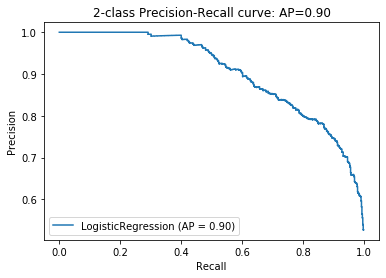

In [6]:
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [7]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,gender,0.000000
1,age,-0.057321
2,age_o,-0.035005
3,int_corr,0.188986
4,samerace,-0.858994
5,date,-0.057807
6,exphappy,0.014832
7,attr3_1,0.133912
8,sinc3_1,-0.026441
9,fun3_1,-0.183424


# Support Vector Machine

In [9]:
# This ran for almost an hour

# params = {'C': [.1, 1, 10],
#           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# gscv = GridSearchCV(SVC(), params, cv=3)
# gscv.fit(X_train, y_train)
# gscv.best_params_

In [15]:
svc = SVC(C=10, kernel='poly')
svc.fit(X_train,y_train).score(X_test, y_test)

F:\Programs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8490701001430615

In [16]:
y_score = svc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.90


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.90')

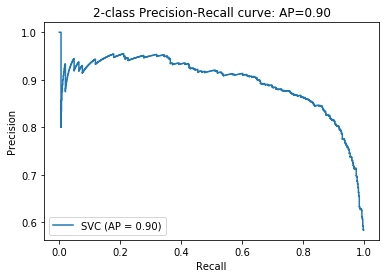

In [17]:
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# k-Nearest Neighbor

In [13]:
params = {'n_neighbors': [3, 5, 10],
          'p': [1, 2]}

gscv = GridSearchCV(KNeighborsClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'n_neighbors': 10, 'p': 1}

In [9]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(X_train, y_train).score(X_test, y_test)

F:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8369098712446352

# Decision Tree

In [15]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3, 5, 7, 10, 12, 15, 25]}

gscv = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [8]:
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtc.fit(X_train,y_train).score(X_test, y_test)

0.7868383404864091

# Random Forest

In [17]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(RandomForestClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'criterion': 'gini', 'max_depth': 25, 'n_estimators': 100}

In [10]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=150)
rfc.fit(X_train,y_train).score(X_test, y_test)

F:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9291845493562232

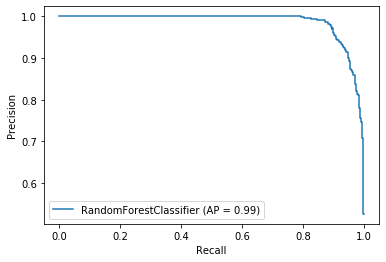

In [11]:
# y_score = rfc.predict_proba(X_test)
# average_precision = average_precision_score(y_test, y_score)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))
disp = plot_precision_recall_curve(rfc, X_test, y_test)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

# Gradient Boosting

In [185]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(GradientBoostingClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [12]:
gbc = GradientBoostingClassifier(max_depth=5, n_estimators=50)
gbc.fit(X_train,y_train).score(X_train, y_train)

F:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9330948121645796

In [13]:
gbc.score(X_test, y_test)

0.9170243204577968

Average precision-recall score: 0.98


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

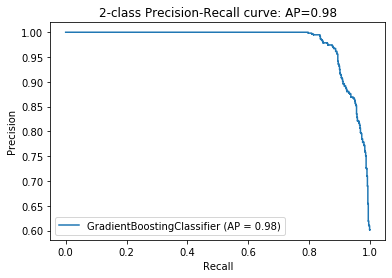

In [14]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# XGBoost

In [184]:
params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [3, 5, 10]}

gscv = GridSearchCV(XGBClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [18]:
xgb = XGBClassifier(max_depth=10, n_estimators=200, early_stopping_rounds=10)
xgb.fit(X_train, y_train).score(X_train, y_train)

F:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [19]:
xgb.fit(X_train, y_train).score(X_test, y_test)

0.9234620886981402

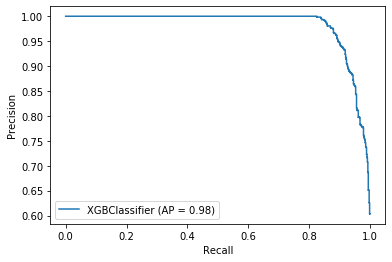

In [20]:
# y_score = xgb.predict_proba(X_test)
# average_precision = average_precision_score(y_test, y_score)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

disp = plot_precision_recall_curve(xgb, X_test, y_test)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

# Stacking

In [44]:
ensemble = [LogisticRegression(max_iter=2000),GaussianNB(),KNeighborsClassifier()]
stc = StackingClassifier(ensemble,LogisticRegression(max_iter=2000))
stc.fit(X_train,y_train).score(X_test, y_test)

0.8363201911589009

# Oversampling

In [179]:
# X_train_r, y_train_r = ADASYN().fit_sample(X_train, y_train) #.49
X_train_r, y_train_r = SMOTE().fit_sample(X_train, y_train)

In [21]:
xgb = XGBClassifier(max_depth=10, n_estimators=200)
xgb.fit(X_train_r,y_train_r).score(X_test, y_test)

NameError: name 'X_train_r' is not defined

Average precision-recall score: 0.47


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.47')

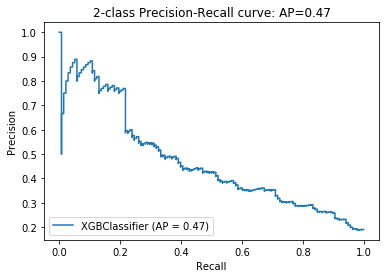

In [189]:
y_score = xgb.predict_proba(X_test)[:,1]
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(xgb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [192]:
gbc = GradientBoostingClassifier(max_depth=5, n_estimators=50)
gbc.fit(X_train_r,y_train_r).score(X_test, y_test)

0.8614097968936678

Average precision-recall score: 0.53


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.53')

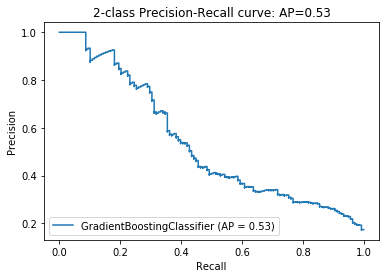

In [193]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))